## Bird Strike Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/Users/ashleshad/Downloads/Bird Strikes_Final.xlsx")

In [3]:
df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,False,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,...,False,False,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,...,False,False,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,True,False,Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,2003-06-23,No damage,...,False,False,Small,No Cloud,European starling,N,0,50.0,0,No


In [4]:
df.shape

(25556, 25)

In [5]:
# 1. Visuals Depicting the Number of Bird Strikes (Yearly Analysis)
df['Incident Year'] = pd.to_datetime(df['FlightDate']).dt.year
yearly_strikes = df.groupby('FlightDate').size()

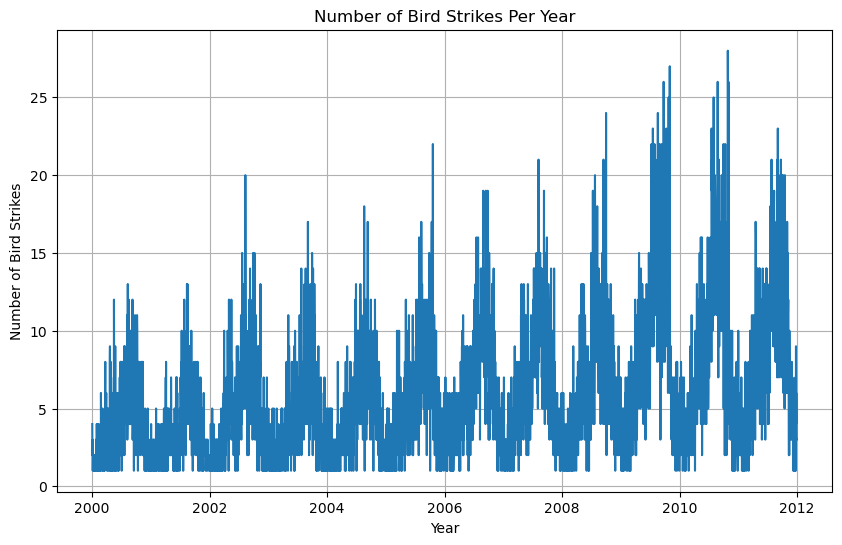

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_strikes.index, y=yearly_strikes.values)
plt.title('Number of Bird Strikes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.grid(True)
plt.show()

### We can see that from the year 2009-2011 there are larger number of strikes.

In [7]:
# 2. Bird Strikes in US
us_states = ['New York', 'Texas', 'Louisiana', 'Washington', 'Virginia', 'Delaware', 'DC', 'Georgia', 'Florida', 
             'California', 'Illinois', 'Connecticut', 'Missouri', 'Rhode Island', 'Hawaii', 'Arizona', 'Tennessee']

# Filter the DataFrame for US bird strikes
us_bird_strikes = df[df['Origin State'].isin(us_states)]

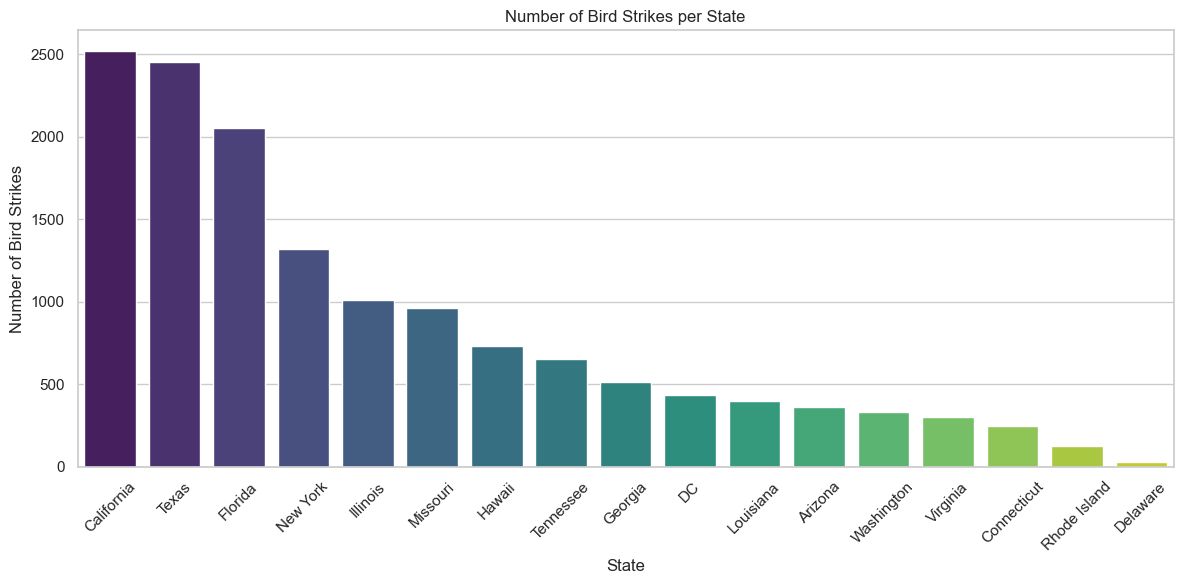

In [133]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
state_counts = us_bird_strikes['Origin State'].value_counts()
sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")
plt.title('Number of Bird Strikes per State')
plt.xlabel('State')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### California, Texas and Florida has the highest number of bird strike incidents.

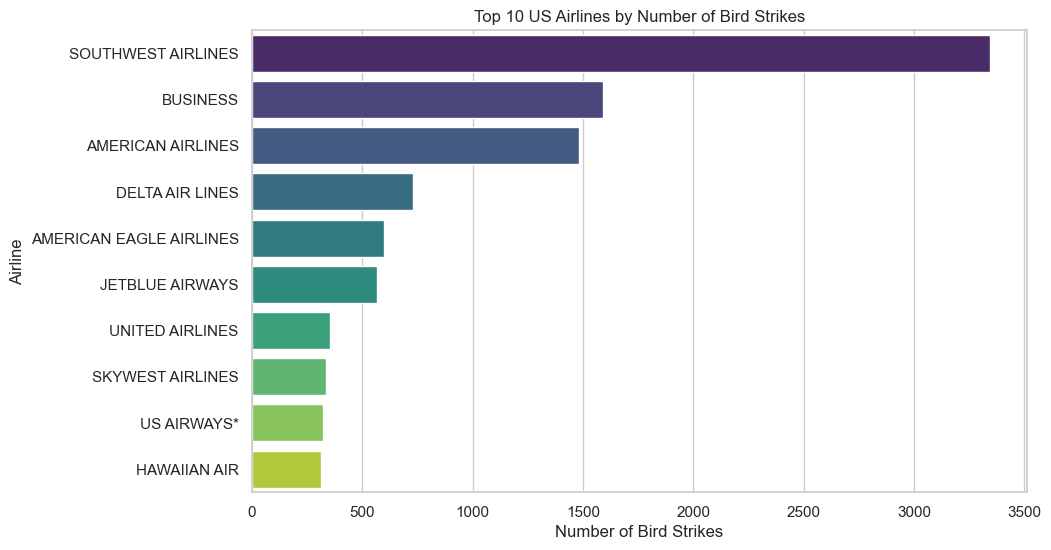

In [9]:
# 3. Top 10 US Airlines in terms of having encountered bird strikes
top_airlines = us_bird_strikes['Aircraft: Airline/Operator'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_airlines.values, y=top_airlines.index, palette='viridis')
plt.title('Top 10 US Airlines by Number of Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airline')
plt.show()

### Southwest Airlines has encountered bird strike incidents most.

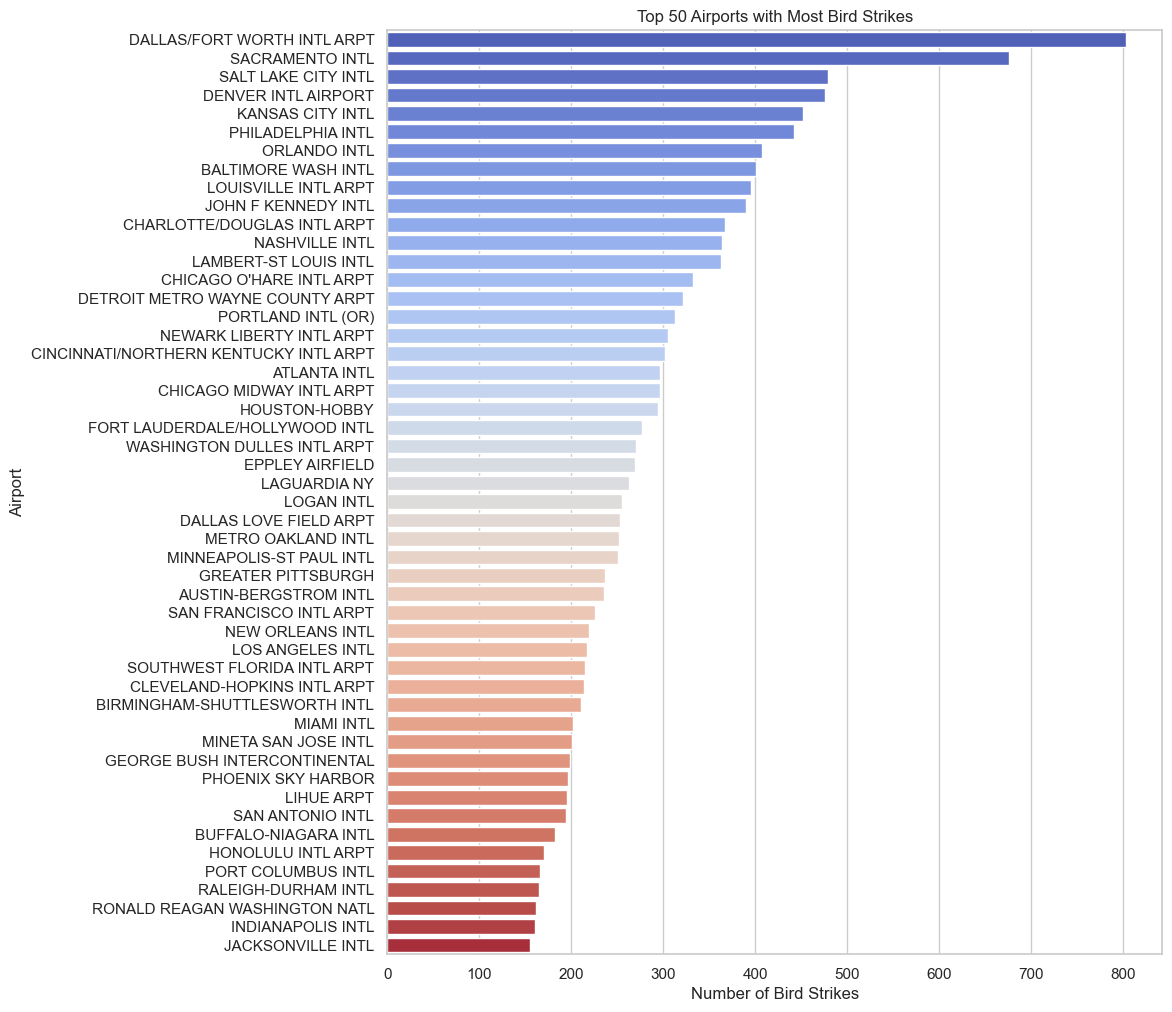

In [10]:
# 4. Airports with most incidents of bird strikes – Top 50
top_airports = df['Airport: Name'].value_counts().nlargest(50)

plt.figure(figsize=(10, 12))
sns.barplot(x=top_airports.values, y=top_airports.index, palette='coolwarm')
plt.title('Top 50 Airports with Most Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airport')
plt.show()

### These are the top 50 Airports having encountered bird strikes, Dallas/Fort Worth International Airport being the topmost.

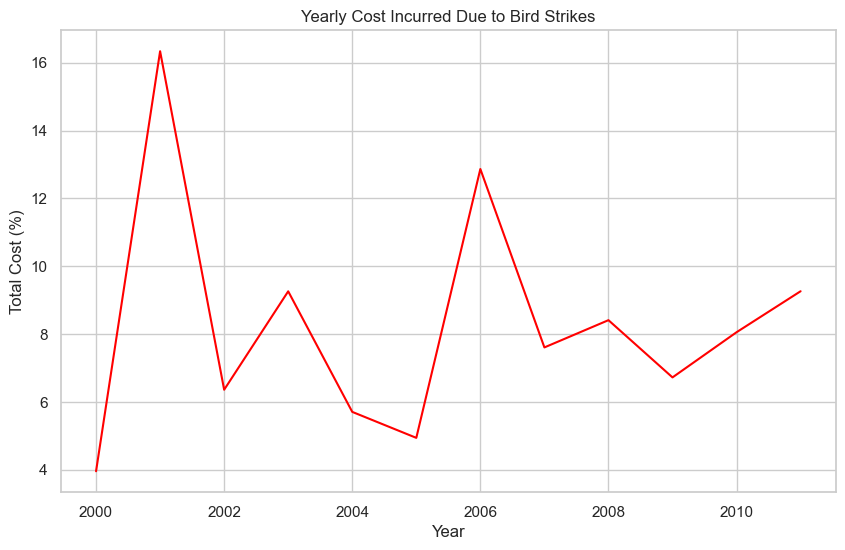

In [11]:
# 5. Yearly Cost Incurred due to Bird Strikes

total_cost = df['Cost: Total $'].sum()

#Calculate yearly costs
yearly_cost = df.groupby('Incident Year')['Cost: Total $'].sum()

#Converting yearly costs to percentages
yearly_cost_percent = (yearly_cost / total_cost) * 100

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_cost_percent.index, y=yearly_cost_percent.values, color='red')
plt.title('Yearly Cost Incurred Due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost (%)')
plt.grid(True)
plt.show()

### Cost incurred due to bird stirke is highest in 2001 which is more than 16%

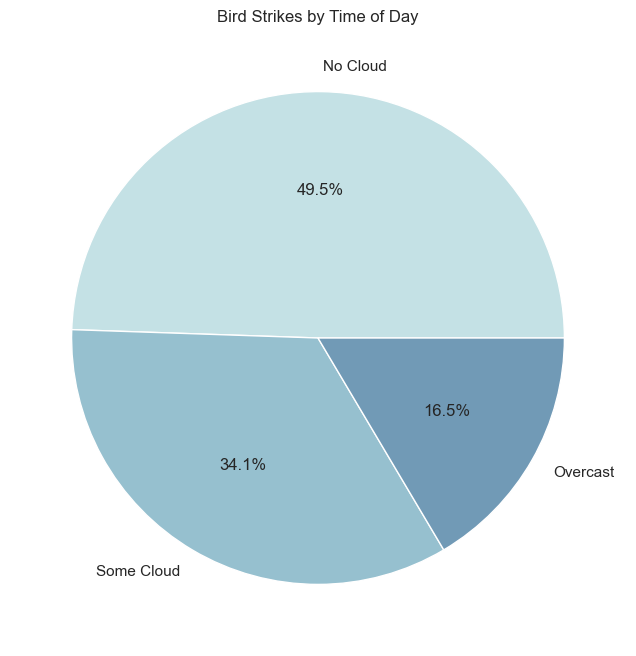

In [12]:
# 6. When do most bird strikes occur? (Time of day)
time_of_day = df['Conditions: Sky'].value_counts()

colors = sns.cubehelix_palette(rot=-.2)
plt.figure(figsize=(8, 8))
plt.pie(time_of_day, labels=time_of_day.index, autopct='%1.1f%%', colors=colors)
plt.title('Bird Strikes by Time of Day')
plt.show()

### Most of the incidents have happened when there is no cloud 

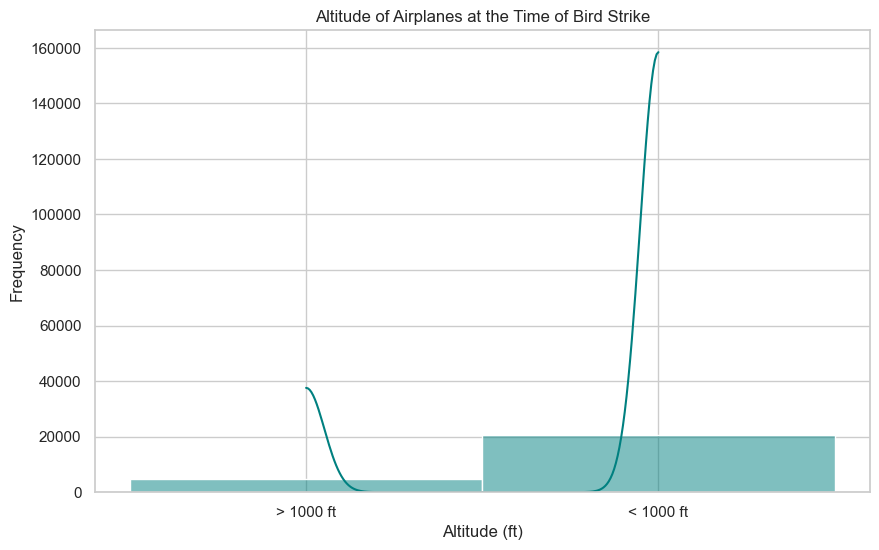

In [13]:
# 7. Altitude of airplanes at the time of strike
plt.figure(figsize=(10, 6))
sns.histplot(df['Altitude bin'], bins=30, kde=True, color='teal')
plt.title('Altitude of Airplanes at the Time of Bird Strike')
plt.xlabel('Altitude (ft)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Mostof bird strike incidents have happened when the altitude of airplane was <1000 ft and lesser happend when altitude was >1000 ft.

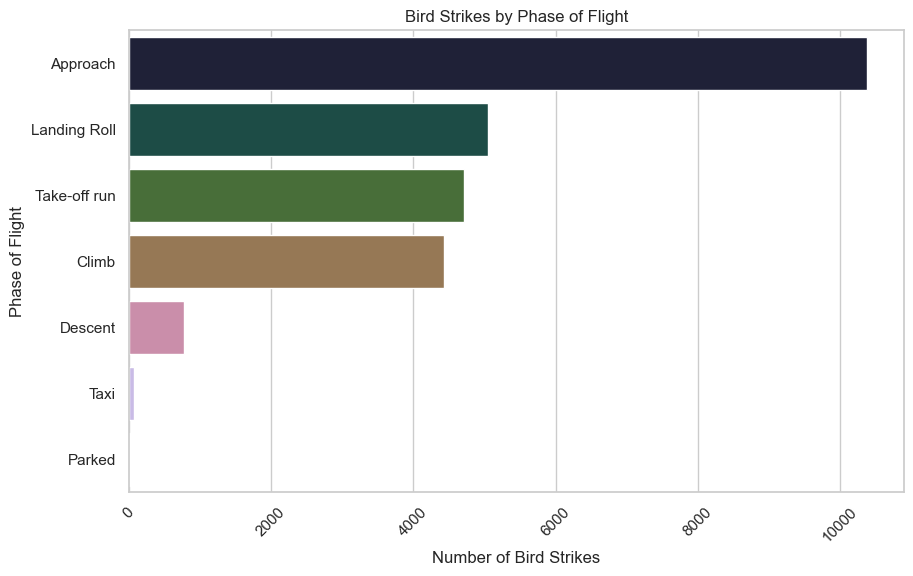

In [18]:
# 8. Phase of flight at the time of strike
flight_phase = df['When: Phase of flight'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=flight_phase.values, y=flight_phase.index, palette='cubehelix')
plt.title('Bird Strikes by Phase of Flight')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Phase of Flight')
plt.xticks(rotation=45)
plt.show()

### Most of the incidents happened when the flight was in approach phase

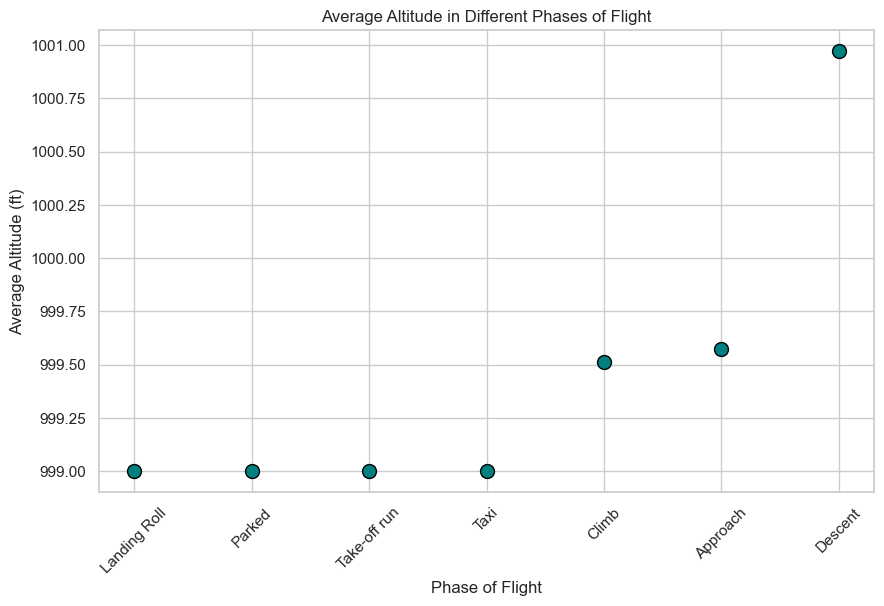

In [29]:
# 9. Average Altitude of the airplanes in different phases at the time of strike
# Convert 'Altitude bin' to numeric, handling non-numeric values
df['Altitude bin'] = df['Altitude bin'].replace({'< 1000 ft': 999, '> 1000 ft': 1001})
df['Altitude bin'] = pd.to_numeric(df['Altitude bin'], errors='coerce')

# Drop rows with NaN values in 'Altitude bin'
df_clean = df.dropna(subset=['Altitude bin'])
avg_altitude_phase = df_clean.groupby('When: Phase of flight')['Altitude bin'].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.scatter(avg_altitude_phase.index, avg_altitude_phase.values, color='teal', s=100, edgecolor='black')
plt.title('Average Altitude in Different Phases of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Average Altitude (ft)')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

### Average Altitude of the airplanes is found to be the most the Descent phase at the time of strike

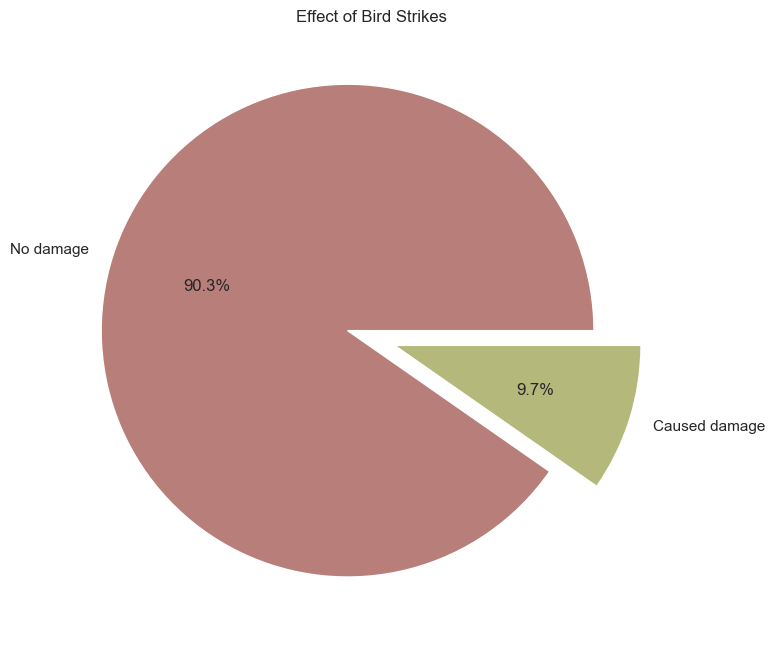

In [50]:
# 10. Effect of Bird Strikes
effect_of_strike = df['Effect: Indicated Damage'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(effect_of_strike, labels=effect_of_strike.index, autopct='%1.1f%%', colors=sns.hls_palette(s=.3), explode = [0.1] * len(effect_of_strike))
plt.title('Effect of Bird Strikes')
plt.show()

### 90.3% incidents caused no damage while 9.69% incidents caused damage

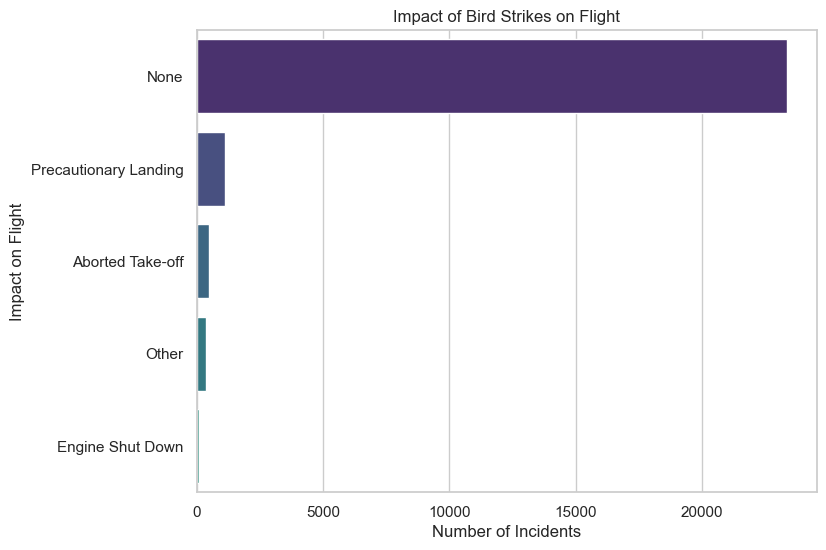

In [56]:
# 11. Impact on Flight
impact_on_flight = df['Effect: Impact to flight'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=impact_on_flight.values, y=impact_on_flight.index, palette=sns.mpl_palette("viridis", 8))
plt.title('Impact of Bird Strikes on Flight')
plt.xlabel('Number of Incidents')
plt.ylabel('Impact on Flight')
plt.show()

### Most of the time when incident happened there was no impact on flights

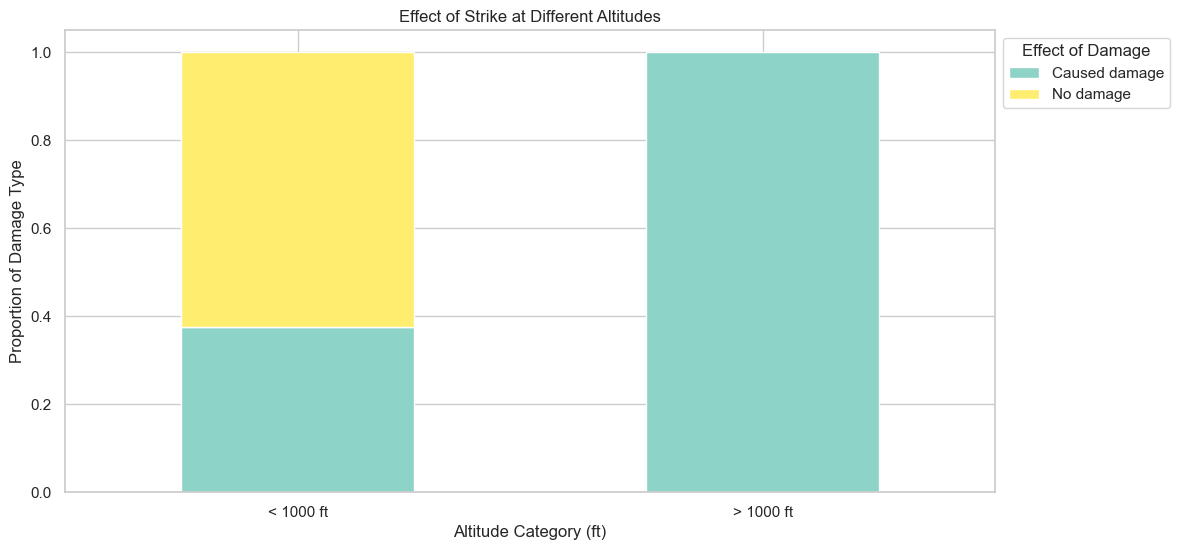

In [132]:
# 12. Effect of Strike at Different Altitudes

# Convert 'Altitude bin' to numeric values for binning
def altitude_to_numeric(altitude_bin):
    if altitude_bin == '> 1000 ft':
        return 1000  # Treat as 1000+ ft
    elif altitude_bin == '< 1000 ft':
        return 500   # Midpoint of '< 1000 ft'
    return None

# Define bins and labels for altitude categories
bins = [0, 1000, 5000, 10000, 20000, 40000]
labels = ['0-1k', '1k-5k', '5k-10k', '10k-20k', '20k-40k']

# Group by 'Altitude Category' and 'Effect: Indicated Damage'
grouped = df.groupby('Altitude bin')['Effect: Indicated Damage'].value_counts().unstack().fillna(0)

# Normalize to get proportions
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Plot the data
plt.figure(figsize=(12, 6))
proportions.plot(kind='bar', stacked=True, colormap='Set3', ax=plt.gca())
plt.title('Effect of Strike at Different Altitudes')
plt.xlabel('Altitude Category (ft)')
plt.ylabel('Proportion of Damage Type')
plt.legend(title='Damage Effect')
plt.xticks(rotation=0)
plt.legend(title='Effect of Damage', bbox_to_anchor=(1, 1))
plt.show()


### Damage incidents are predominantly observed at altitudes above 1000 feet, whereas occurrences of damage are relatively lower at altitudes below 1000 feet.

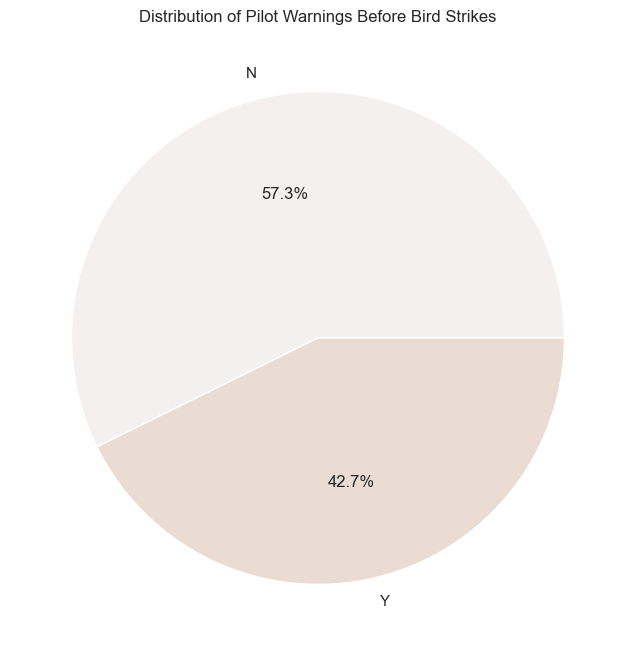

In [86]:
# 13. Were Pilots Informed? (Prior Warning)
pilots_informed = df['Pilot warned of birds or wildlife?'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(pilots_informed, labels=pilots_informed.index, autopct='%1.1f%%', colors=sns.light_palette("xkcd:copper", 8))
plt.title('Distribution of Pilot Warnings Before Bird Strikes')
plt.show()

### 57.3% of the times Pilot was not informed about the birds and 42.7% incidents where pilot was warned

/var/folders/_j/tzw6wdvd1fv_1s_66tcw6my40000gn/T/ipykernel_3353/3948465950.py:5: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warning_effect_relation.plot(kind='bar', colormap='Paired', color=['#d1dab6', '#38594d'], ax=plt.gca())


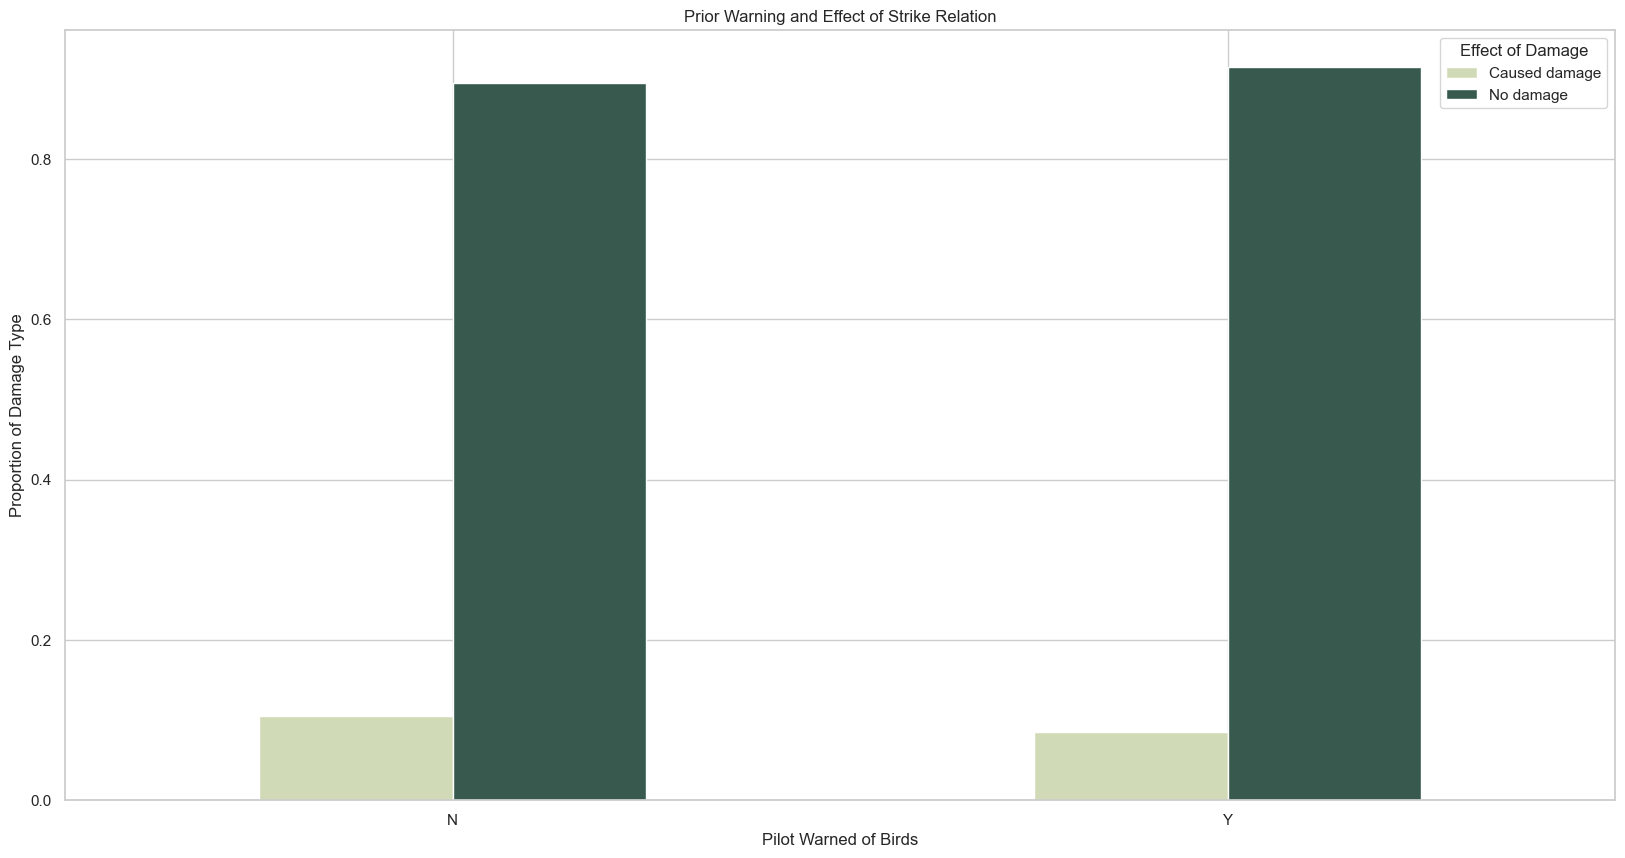

In [117]:
# 14. Prior Warning and Effect of Strike Relation
warning_effect_relation = pd.crosstab(df['Pilot warned of birds or wildlife?'], df['Effect: Indicated Damage'], normalize='index')

plt.figure(figsize=(20, 10))
warning_effect_relation.plot(kind='bar', colormap='Paired', color=['#d1dab6', '#38594d'], ax=plt.gca())
plt.title('Prior Warning and Effect of Strike Relation')
plt.xlabel('Pilot Warned of Birds')
plt.ylabel('Proportion of Damage Type')
plt.xticks(rotation=0)
plt.legend(title='Effect of Damage', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

### The analysis reveals that, regardless of whether pilots were notified about potential bird strikes, incidents of damage were relatively infrequent. In most cases, damage did not occur, indicating that the overall impact of bird strikes was limited.